In [1]:
#01-BU

#The business objectives is to identify key factors that contribute to emissions, understand how they relate to  climate change, and project future emissions trends. 

In [18]:
!pip install pyspark
!pip install pyspark matplotlib seaborn

from pyspark.sql import SparkSession
from pyspark.sql.functions import min, max
from pyspark.sql.functions import col, desc
from pyspark.sql.functions import corr, abs as abs_col
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.functions import col, expr, percentile_approx
from pyspark.sql.functions import col, expr, count, when
from pyspark.sql.functions import col, when, percentile_approx
from pyspark.sql.functions import col, when, percentile_approx, mean, stddev
from pyspark.sql.functions import mean, stddev
from pyspark.sql.functions import col
from pyspark.sql.functions import col, when, percentile_approx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# 02-DU

# Initialize SparkSession
spark = SparkSession.builder.appName("AgrofoodAnalysis").getOrCreate()

# Load the CSV file using PySpark
df = spark.read.csv('Agrofood.csv',header=True, inferSchema=True)

# the shape of the dataset
shape = (df.count(), len(df.columns))
print("Shape:", shape)

# the data types of the dataset
data_types = df.dtypes
print("Data Types:", data_types)

# Print the data types of each column
df.printSchema()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/21 03:31:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Shape: (6965, 31)
Data Types: [('Area', 'string'), ('Year', 'int'), ('Savanna fires', 'double'), ('Forest fires', 'double'), ('Crop Residues', 'double'), ('Rice Cultivation', 'double'), ('Drained organic soils (CO2)', 'double'), ('Pesticides Manufacturing', 'double'), ('Food Transport', 'double'), ('Forestland', 'double'), ('Net Forest conversion', 'double'), ('Food Household Consumption', 'double'), ('Food Retail', 'double'), ('On-farm Electricity Use', 'double'), ('Food Packaging', 'double'), ('Agrifood Systems Waste Disposal', 'double'), ('Food Processing', 'double'), ('Fertilizers Manufacturing', 'double'), ('IPPU', 'double'), ('Manure applied to Soils', 'double'), ('Manure left on Pasture', 'double'), ('Manure Management', 'double'), ('Fires in organic soils', 'double'), ('Fires in humid tropical forests', 'double'), ('On-farm energy use', 'double'), ('Rural population', 'double'), ('Urban population', 'double'), ('Total Population - Male', 'double'), ('Total Population - Female',

In [4]:
 #Explore Data
# Print the minimum value for each column
min = df.select([min(col).alias(col) for col in df.columns]).collect()[0].asDict()
print("Minimum Values:", min)

# Print the maximum value for each column
max = df.select([max(col).alias(col) for col in df.columns]).collect()[0].asDict()
print("Maximum Values:", max)

24/05/21 03:36:29 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Minimum Values: {'Area': 'Afghanistan', 'Year': 1990, 'Savanna fires': 0.0, 'Forest fires': 0.0, 'Crop Residues': 0.0, 'Rice Cultivation': 0.0, 'Drained organic soils (CO2)': 0.0, 'Pesticides Manufacturing': 0.0, 'Food Transport': 0.0, 'Forestland': -797183.08, 'Net Forest conversion': 0.0, 'Food Household Consumption': 0.0, 'Food Retail': 0.0, 'On-farm Electricity Use': 0.0, 'Food Packaging': 0.0, 'Agrifood Systems Waste Disposal': 0.34, 'Food Processing': 0.0, 'Fertilizers Manufacturing': 0.0, 'IPPU': 0.0, 'Manure applied to Soils': 0.05, 'Manure left on Pasture': 0.0, 'Manure Management': 0.43, 'Fires in organic soils': 0.0, 'Fires in humid tropical forests': 0.0, 'On-farm energy use': 0.03, 'Rural population': 0.0, 'Urban population': 0.0, 'Total Population - Male': 250.0, 'Total Population - Female': 270.0, 'total_emission': -391884.06, 'Average Temperature ??C': -1.42}


Maximum Values: {'Area': 'Zimbabwe', 'Year': 2020, 'Savanna fires': 114616.4, 'Forest fires': 52227.63, 'Crop Residues': 33490.07, 'Rice Cultivation': 164915.26, 'Drained organic soils (CO2)': 241025.07, 'Pesticides Manufacturing': 16459.0, 'Food Transport': 67945.77, 'Forestland': 171121.08, 'Net Forest conversion': 1605106.1, 'Food Household Consumption': 466288.2, 'Food Retail': 133784.07, 'On-farm Electricity Use': 165676.3, 'Food Packaging': 175741.31, 'Agrifood Systems Waste Disposal': 213289.7, 'Food Processing': 274253.51, 'Fertilizers Manufacturing': 170826.42, 'IPPU': 1861640.66, 'Manure applied to Soils': 34677.36, 'Manure left on Pasture': 92630.76, 'Manure Management': 70592.65, 'Fires in organic soils': 991717.54, 'Fires in humid tropical forests': 51771.26, 'On-farm energy use': 248879.18, 'Rural population': 900099113.0, 'Urban population': 902077760.0, 'Total Population - Male': 743586579.0, 'Total Population - Female': 713341908.0, 'total_emission': 3115113.75, 'Avera

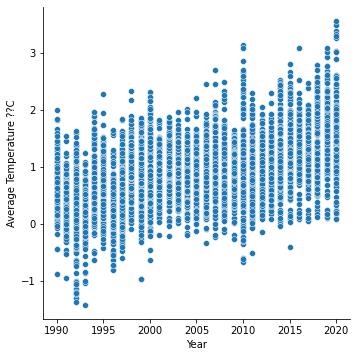

In [5]:
 #Add Visualisations

#Average Temperature vs different year
pandas_df = df.select("Year", "Average Temperature ??C").toPandas()
sns.pairplot(data=pandas_df, x_vars=['Year'], 
             y_vars='Average Temperature ??C', height=5)

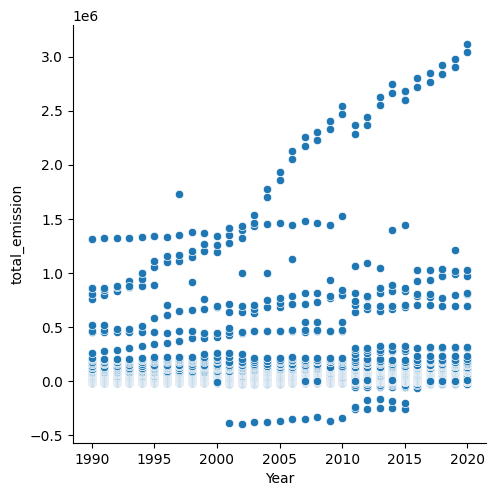

In [6]:
 #Add Visualisations
#Total emissions vs different year 
pandas_df = df.select("Year", "total_emission").toPandas()
sns.pairplot(data = pandas_df, x_vars=['Year'],
             y_vars='total_emission', height=5)

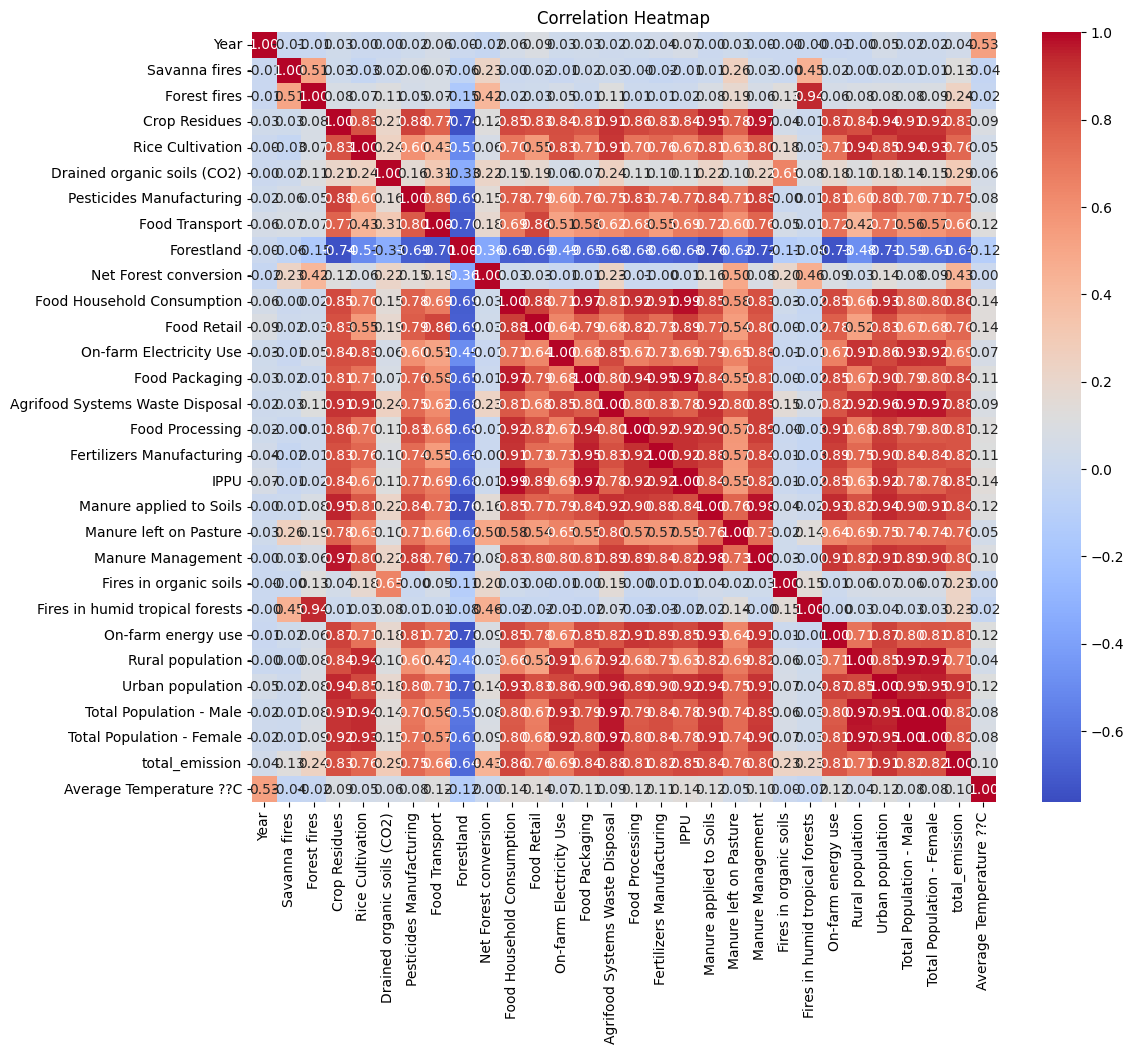

In [7]:
#Add Visualisations
    #heatmap
pandas_df = df.toPandas()

data = pandas_df.drop('Area', axis=1)

correlation = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("heatmap.png")
plt.show()

In [8]:
# Verifying Data Quality
df.printSchema()
df_describe = df.describe()
transposed_df = df_describe.toPandas().set_index('summary').transpose()
print(transposed_df)

root
 |-- Area: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Savanna fires: double (nullable = true)
 |-- Forest fires: double (nullable = true)
 |-- Crop Residues: double (nullable = true)
 |-- Rice Cultivation: double (nullable = true)
 |-- Drained organic soils (CO2): double (nullable = true)
 |-- Pesticides Manufacturing: double (nullable = true)
 |-- Food Transport: double (nullable = true)
 |-- Forestland: double (nullable = true)
 |-- Net Forest conversion: double (nullable = true)
 |-- Food Household Consumption: double (nullable = true)
 |-- Food Retail: double (nullable = true)
 |-- On-farm Electricity Use: double (nullable = true)
 |-- Food Packaging: double (nullable = true)
 |-- Agrifood Systems Waste Disposal: double (nullable = true)
 |-- Food Processing: double (nullable = true)
 |-- Fertilizers Manufacturing: double (nullable = true)
 |-- IPPU: double (nullable = true)
 |-- Manure applied to Soils: double (nullable = true)
 |-- Manure left on Past

summary                         count                  mean  \
Area                             6965                  None   
Year                             6965    2005.1249102656138   
Savanna fires                    6934     1188.390881165273   
Forest fires                     6872     919.3021507566943   
Crop Residues                    5576      998.706380918221   
Rice Cultivation                 6965     4259.666750897336   
Drained organic soils (CO2)      6965     3503.228646087578   
Pesticides Manufacturing         6965    333.41822397702873   
Food Transport                   6965    1939.5817803302232   
Forestland                       6472    -17828.28565203955   
Net Forest conversion            6472     17605.64198084059   
Food Household Consumption       6492     4847.580468268632   
Food Retail                      6965    2043.2107379755926   
On-farm Electricity Use          6965    1626.6811055276353   
Food Packaging                   6965    1658.629276381

In [9]:
#03-DP

# Feature correlation with average tempareture

# Drop a column 'area'
data = df.drop('Area')

# Each variable correlation with 'Average Temperature ??C'
columns = data.columns
columns.remove('Average Temperature ??C')

correlations = []
for col_name in columns:
    corr_value = data.stat.corr('Average Temperature ??C', col_name)
    correlations.append((col_name, abs(corr_value)))
    
correlation_df = spark.createDataFrame(correlations, ['Variable', 'Correlation'])
sorted_corr_df = correlation_df.orderBy(correlation_df.Correlation.desc())

sorted_corr_df.show()

+--------------------+-------------------+
|            Variable|        Correlation|
+--------------------+-------------------+
|                Year| 0.5300551333503077|
|         Food Retail|0.13830573738029145|
|                IPPU| 0.1376555312481066|
|Food Household Co...|0.13334533950644772|
|      Food Transport|0.12318650919101419|
|     Food Processing|0.11995657798140029|
|          Forestland|0.11683324562804573|
|    Urban population|0.11510425466706611|
|      Food Packaging|0.11447431590917337|
|Fertilizers Manuf...|0.11312173548440857|
|Manure applied to...|0.11181897921348675|
|  On-farm energy use|0.10940712227015457|
|      total_emission|0.10281974711355374|
|   Manure Management|0.09655570601621648|
|       Crop Residues|0.09559191008752158|
|Agrifood Systems ...|0.08638110271323383|
|Total Population ...|0.07849559482193355|
|Pesticides Manufa...|0.07685887853037247|
|Total Population ...|0.07638683100568085|
|On-farm Electrici...|0.06894288838449014|
+----------

In [10]:
# Attribute selection (drop the attribute we do not need)
columns_to_drop = [
    'Savanna fires', 'Year', 'Forest fires', 'Food Transport', 'Forestland', 'Net Forest conversion', 
    'Food Household Consumption', 'Food Retail', 'Food Packaging', 'Food Processing', 
    'Fires in humid tropical forests', 'Fires in organic soils', 'Rural population', 
    'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission']

data_sub = data.drop(*columns_to_drop)
shape = (data_sub.count(), len(data_sub.columns))
print("Shape:", shape)
data_sub.show(5)

Shape: (6965, 13)
+-------------+----------------+---------------------------+------------------------+-----------------------+-------------------------------+-------------------------+---------+-----------------------+----------------------+-----------------+------------------+-----------------------+
|Crop Residues|Rice Cultivation|Drained organic soils (CO2)|Pesticides Manufacturing|On-farm Electricity Use|Agrifood Systems Waste Disposal|Fertilizers Manufacturing|     IPPU|Manure applied to Soils|Manure left on Pasture|Manure Management|On-farm energy use|Average Temperature ??C|
+-------------+----------------+---------------------------+------------------------+-----------------------+-------------------------------+-------------------------+---------+-----------------------+----------------------+-----------------+------------------+-----------------------+
|       6191.9|         1019.98|                   51191.74|                   771.0|                 9445.5|               

In [11]:
# Check null value in the subset

def nulls_check(df):
    df_cols = df.columns
    cols_total_count = len(df_cols)
    cols_count = 0
    for col_name in df_cols:
        null_count = df.filter(df[col_name].isNull() | isnan(df[col_name])).count()
        total_count = df.count()
        percent_null = round((null_count / total_count) * 100, 2)
        if null_count > 0:
            cols_count += 1
            print(f'{col_name} has {null_count} null value(s): {percent_null}% null')
    print(f'Out of {cols_total_count} total columns, {cols_count} contain null values.')

nulls_check(data_sub)

Crop Residues has 1389 null value(s): 19.94% null
IPPU has 743 null value(s): 10.67% null
Manure applied to Soils has 928 null value(s): 13.32% null
Manure Management has 928 null value(s): 13.32% null
On-farm energy use has 956 null value(s): 13.73% null
Out of 13 total columns, 5 contain null values.


In [12]:
# Removing rows with missing value
data_sub_clean = data_sub.dropna()

# Check for null values in each column
null_counts = data_sub_clean.select([(col(c).isNull().cast("int").alias(c)) for c in data_sub_clean.columns]).groupBy().sum()
null_counts.show()

shape = (data_sub_clean.count(), len(data_sub_clean.columns))
print("Shape:", shape)

+------------------+---------------------+--------------------------------+-----------------------------+----------------------------+------------------------------------+------------------------------+---------+----------------------------+---------------------------+----------------------+-----------------------+----------------------------+
|sum(Crop Residues)|sum(Rice Cultivation)|sum(Drained organic soils (CO2))|sum(Pesticides Manufacturing)|sum(On-farm Electricity Use)|sum(Agrifood Systems Waste Disposal)|sum(Fertilizers Manufacturing)|sum(IPPU)|sum(Manure applied to Soils)|sum(Manure left on Pasture)|sum(Manure Management)|sum(On-farm energy use)|sum(Average Temperature ??C)|
+------------------+---------------------+--------------------------------+-----------------------------+----------------------------+------------------------------------+------------------------------+---------+----------------------------+---------------------------+----------------------+----------------

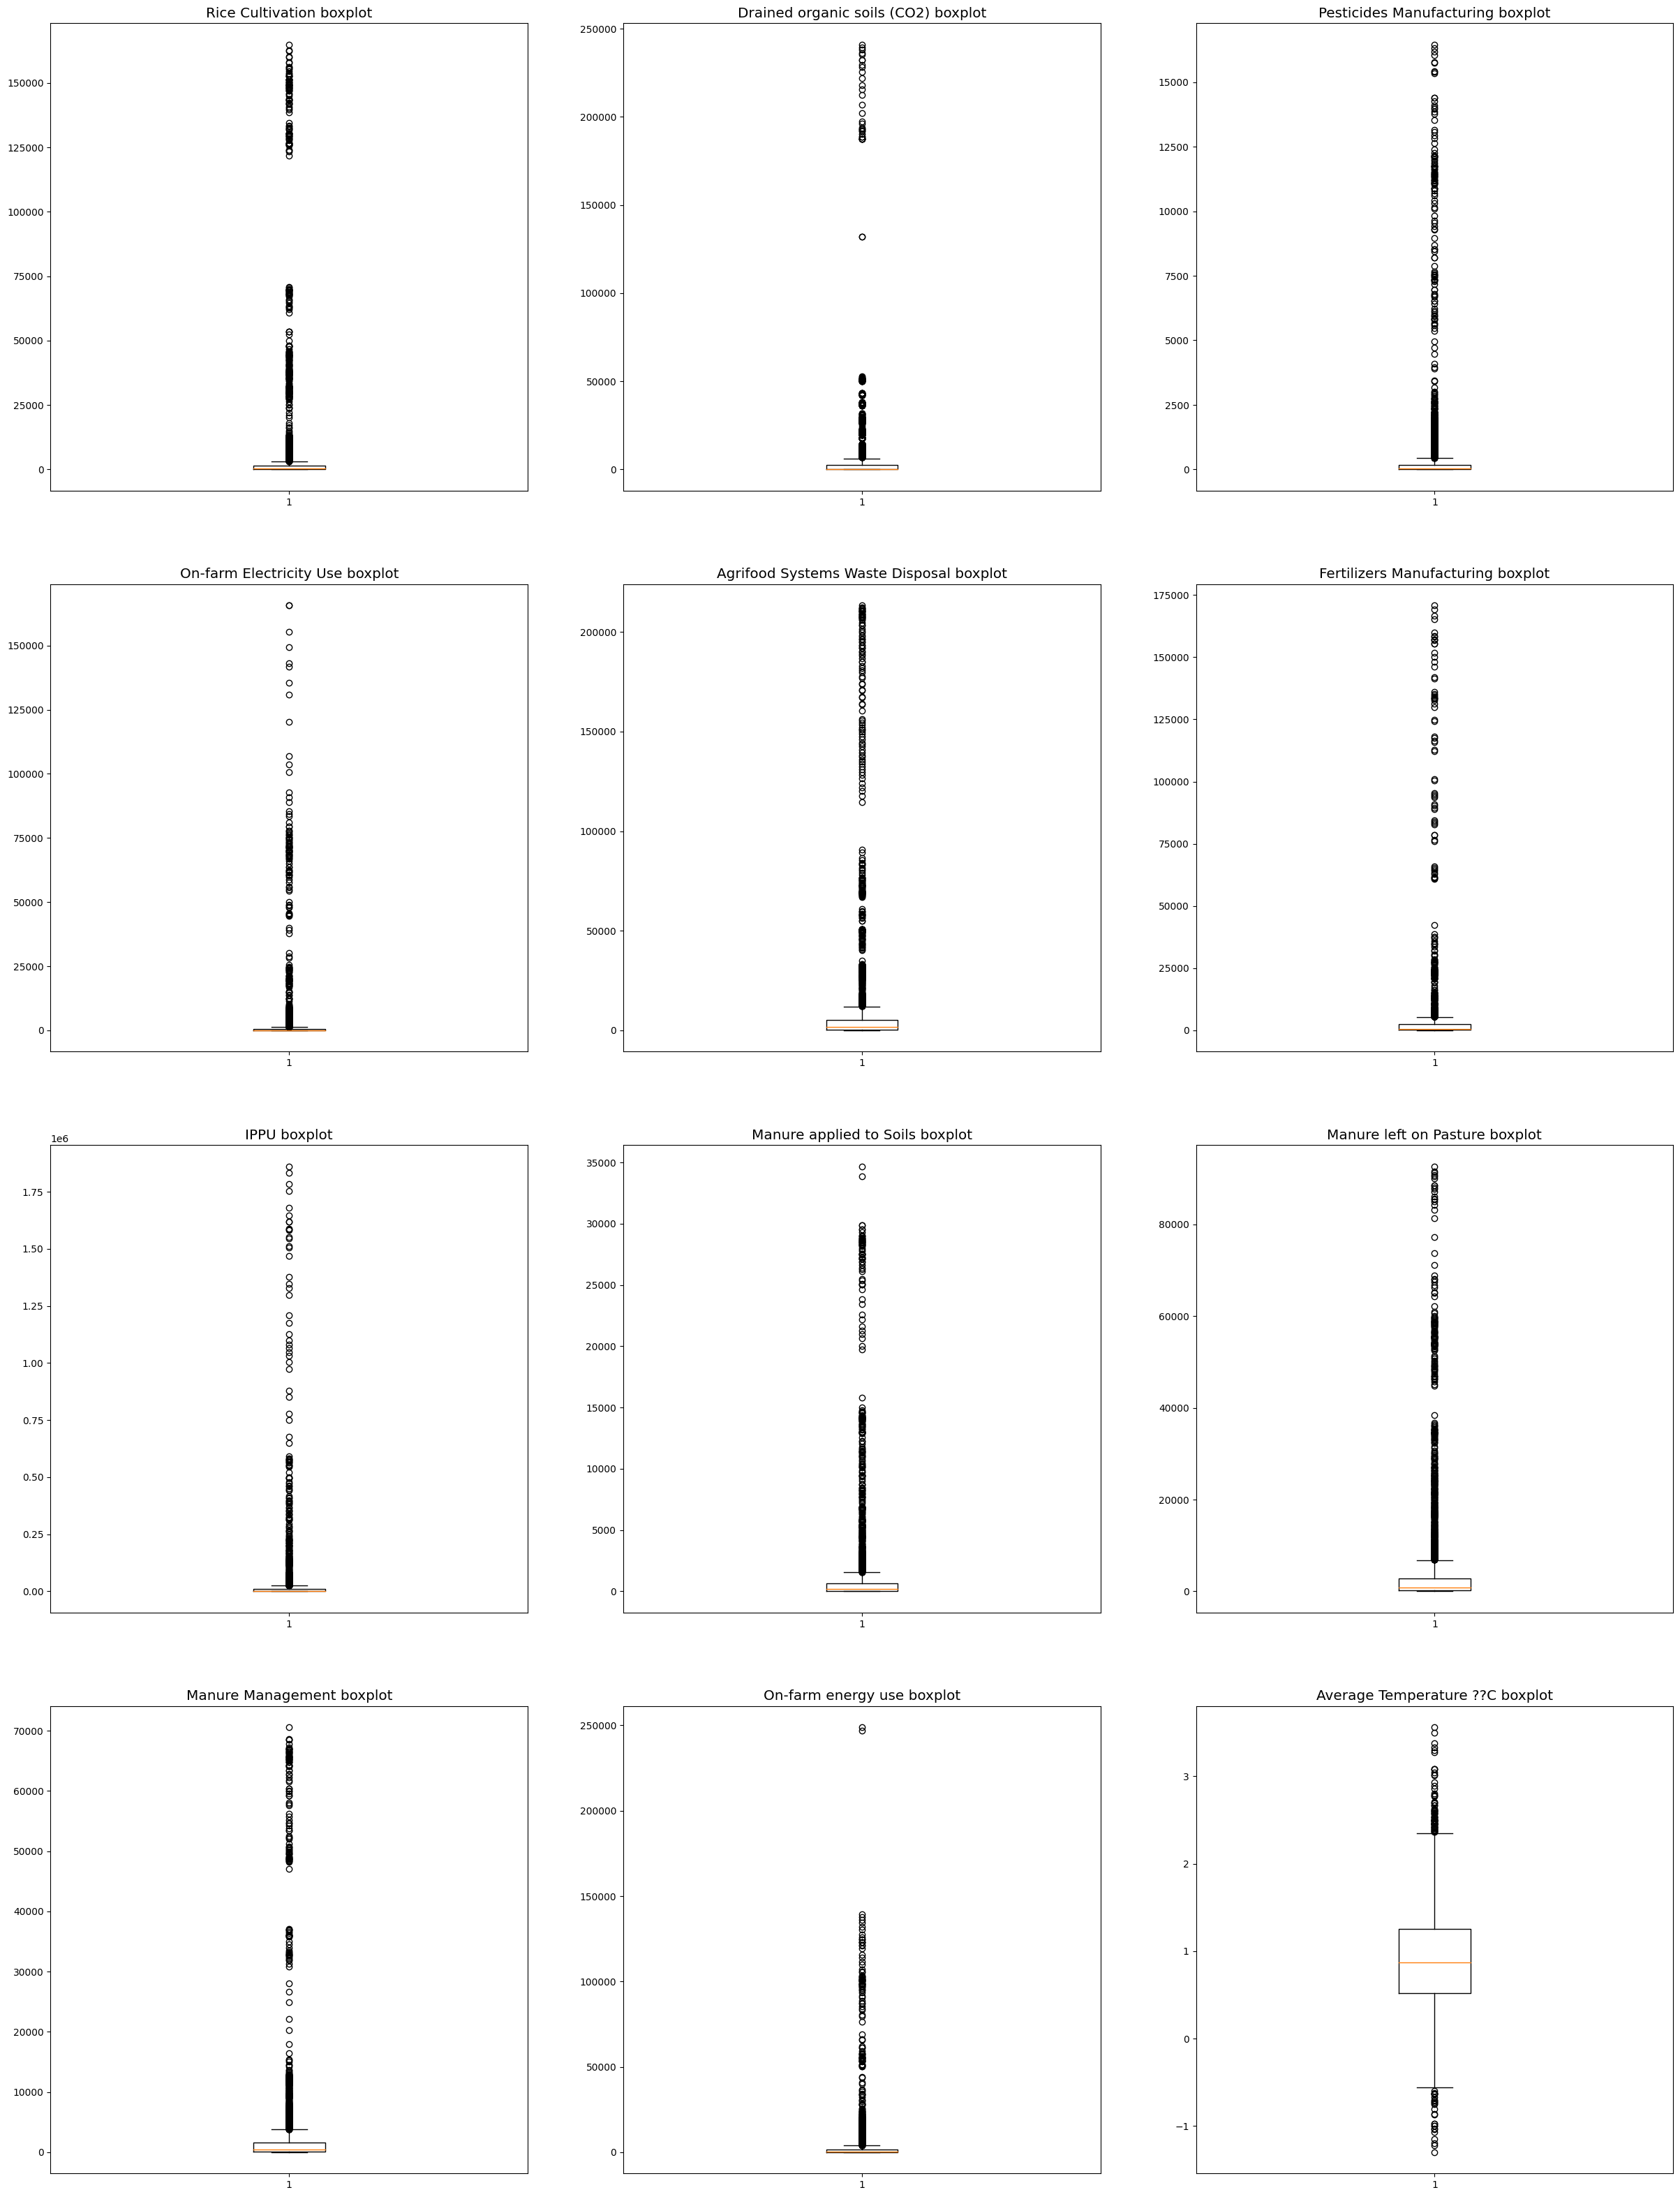

In [13]:
# Detecting outliers
    # Convert to Pandas DataFrame for plotting
pandas_df = data_sub_clean.toPandas()

    # Detecting outliers using boxplots
cols = list(pandas_df.columns)[1:]  
num_cols = len(cols)

num_rows = num_cols // 3 + (num_cols % 3 > 0)
num_subplots = num_rows * 3

plt.figure(figsize=(30, 40))

i = 1
for col in cols:
    plt.subplot(num_rows, 3, i)
    plt.boxplot(pandas_df[col])
    plt.title('{} boxplot'.format(col), fontsize='x-large')
    i += 1

plt.show()


In [14]:
# Count outliers

def outliers_count(col, data):
    q75, q25 = np.percentile(data[col], [75, 25])
    print(f'Q75: {q75}, Q25: {q25}')
    iqr = q75 - q25
    min_val = q25 - (iqr * 1.5)
    max_val = q75 + (iqr * 1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count / len(data[col]) * 100, 2)
    print(f'Number and percentage of outliers in {col}: {outlier_count} and {outlier_percent}%')

    # Columns to analyze for outliers
cols = list(pandas_df.columns)[1:]

    # Count outliers for each column
for col in cols:
    outliers_count(col, pandas_df)

Q75: 1333.975, Q25: 88.6725
Number and percentage of outliers in Rice Cultivation: 692 and 14.45%
Q75: 2462.0750000000003, Q25: 0.0
Number and percentage of outliers in Drained organic soils (CO2): 644 and 13.45%
Q75: 182.62, Q25: 7.0
Number and percentage of outliers in Pesticides Manufacturing: 730 and 15.25%
Q75: 544.0274999999999, Q25: 9.4175
Number and percentage of outliers in On-farm Electricity Use: 770 and 16.08%
Q75: 5062.725, Q25: 410.65250000000003
Number and percentage of outliers in Agrifood Systems Waste Disposal: 516 and 10.78%
Q75: 2393.12, Q25: 356.49
Number and percentage of outliers in Fertilizers Manufacturing: 520 and 10.86%
Q75: 9764.2525, Q25: 145.3975
Number and percentage of outliers in IPPU: 695 and 14.52%
Q75: 646.8625000000001, Q25: 34.7475
Number and percentage of outliers in Manure applied to Soils: 604 and 12.61%
Q75: 2840.19, Q25: 178.8475
Number and percentage of outliers in Manure left on Pasture: 633 and 13.22%
Q75: 1581.0375000000001, Q25: 87.399999

In [15]:
# Winsorization
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, percentile_approx

def winsorize_column(df, col_name, lower_percentile, upper_percentile):
    # Calculate Q1 and Q3
    quantiles = df.select(
        percentile_approx(col_name, lower_percentile).alias('lower_bound'),
        percentile_approx(col_name, 1 - upper_percentile).alias('upper_bound')
    ).collect()[0]
    
    lower_bound = quantiles['lower_bound']
    upper_bound = quantiles['upper_bound']
    
    # Apply Winsorization
    return df.withColumn(col_name, when(col(col_name) < lower_bound, lower_bound)
                                    .when(col(col_name) > upper_bound, upper_bound)
                                    .otherwise(col(col_name)))


winsorize_params = {
    'Crop Residues': (0, 0.17),
    'Rice Cultivation': (0, 0.2),
    'Drained organic soils (CO2)': (0, 0.14),
    'Pesticides Manufacturing': (0, 0.2),
    'On-farm Electricity Use': (0, 0.18),
    'Agrifood Systems Waste Disposal': (0, 0.11),
    'Fertilizers Manufacturing': (0, 0.11),
    'IPPU': (0, 0.15),
    'Manure applied to Soils': (0, 0.13),
    'Manure left on Pasture': (0, 0.14),
    'Manure Management': (0, 0.14),
    'On-farm energy use': (0, 0.15),
    'Average Temperature ??C': (0.02, 0.02)
}

for col_name, (lower, upper) in winsorize_params.items():
    data_sub_clean = winsorize_column(data_sub_clean, col_name, lower, upper)
    
print("Shape:", (data_sub_clean.count(), len(data_sub_clean.columns)))


Shape: (4788, 13)


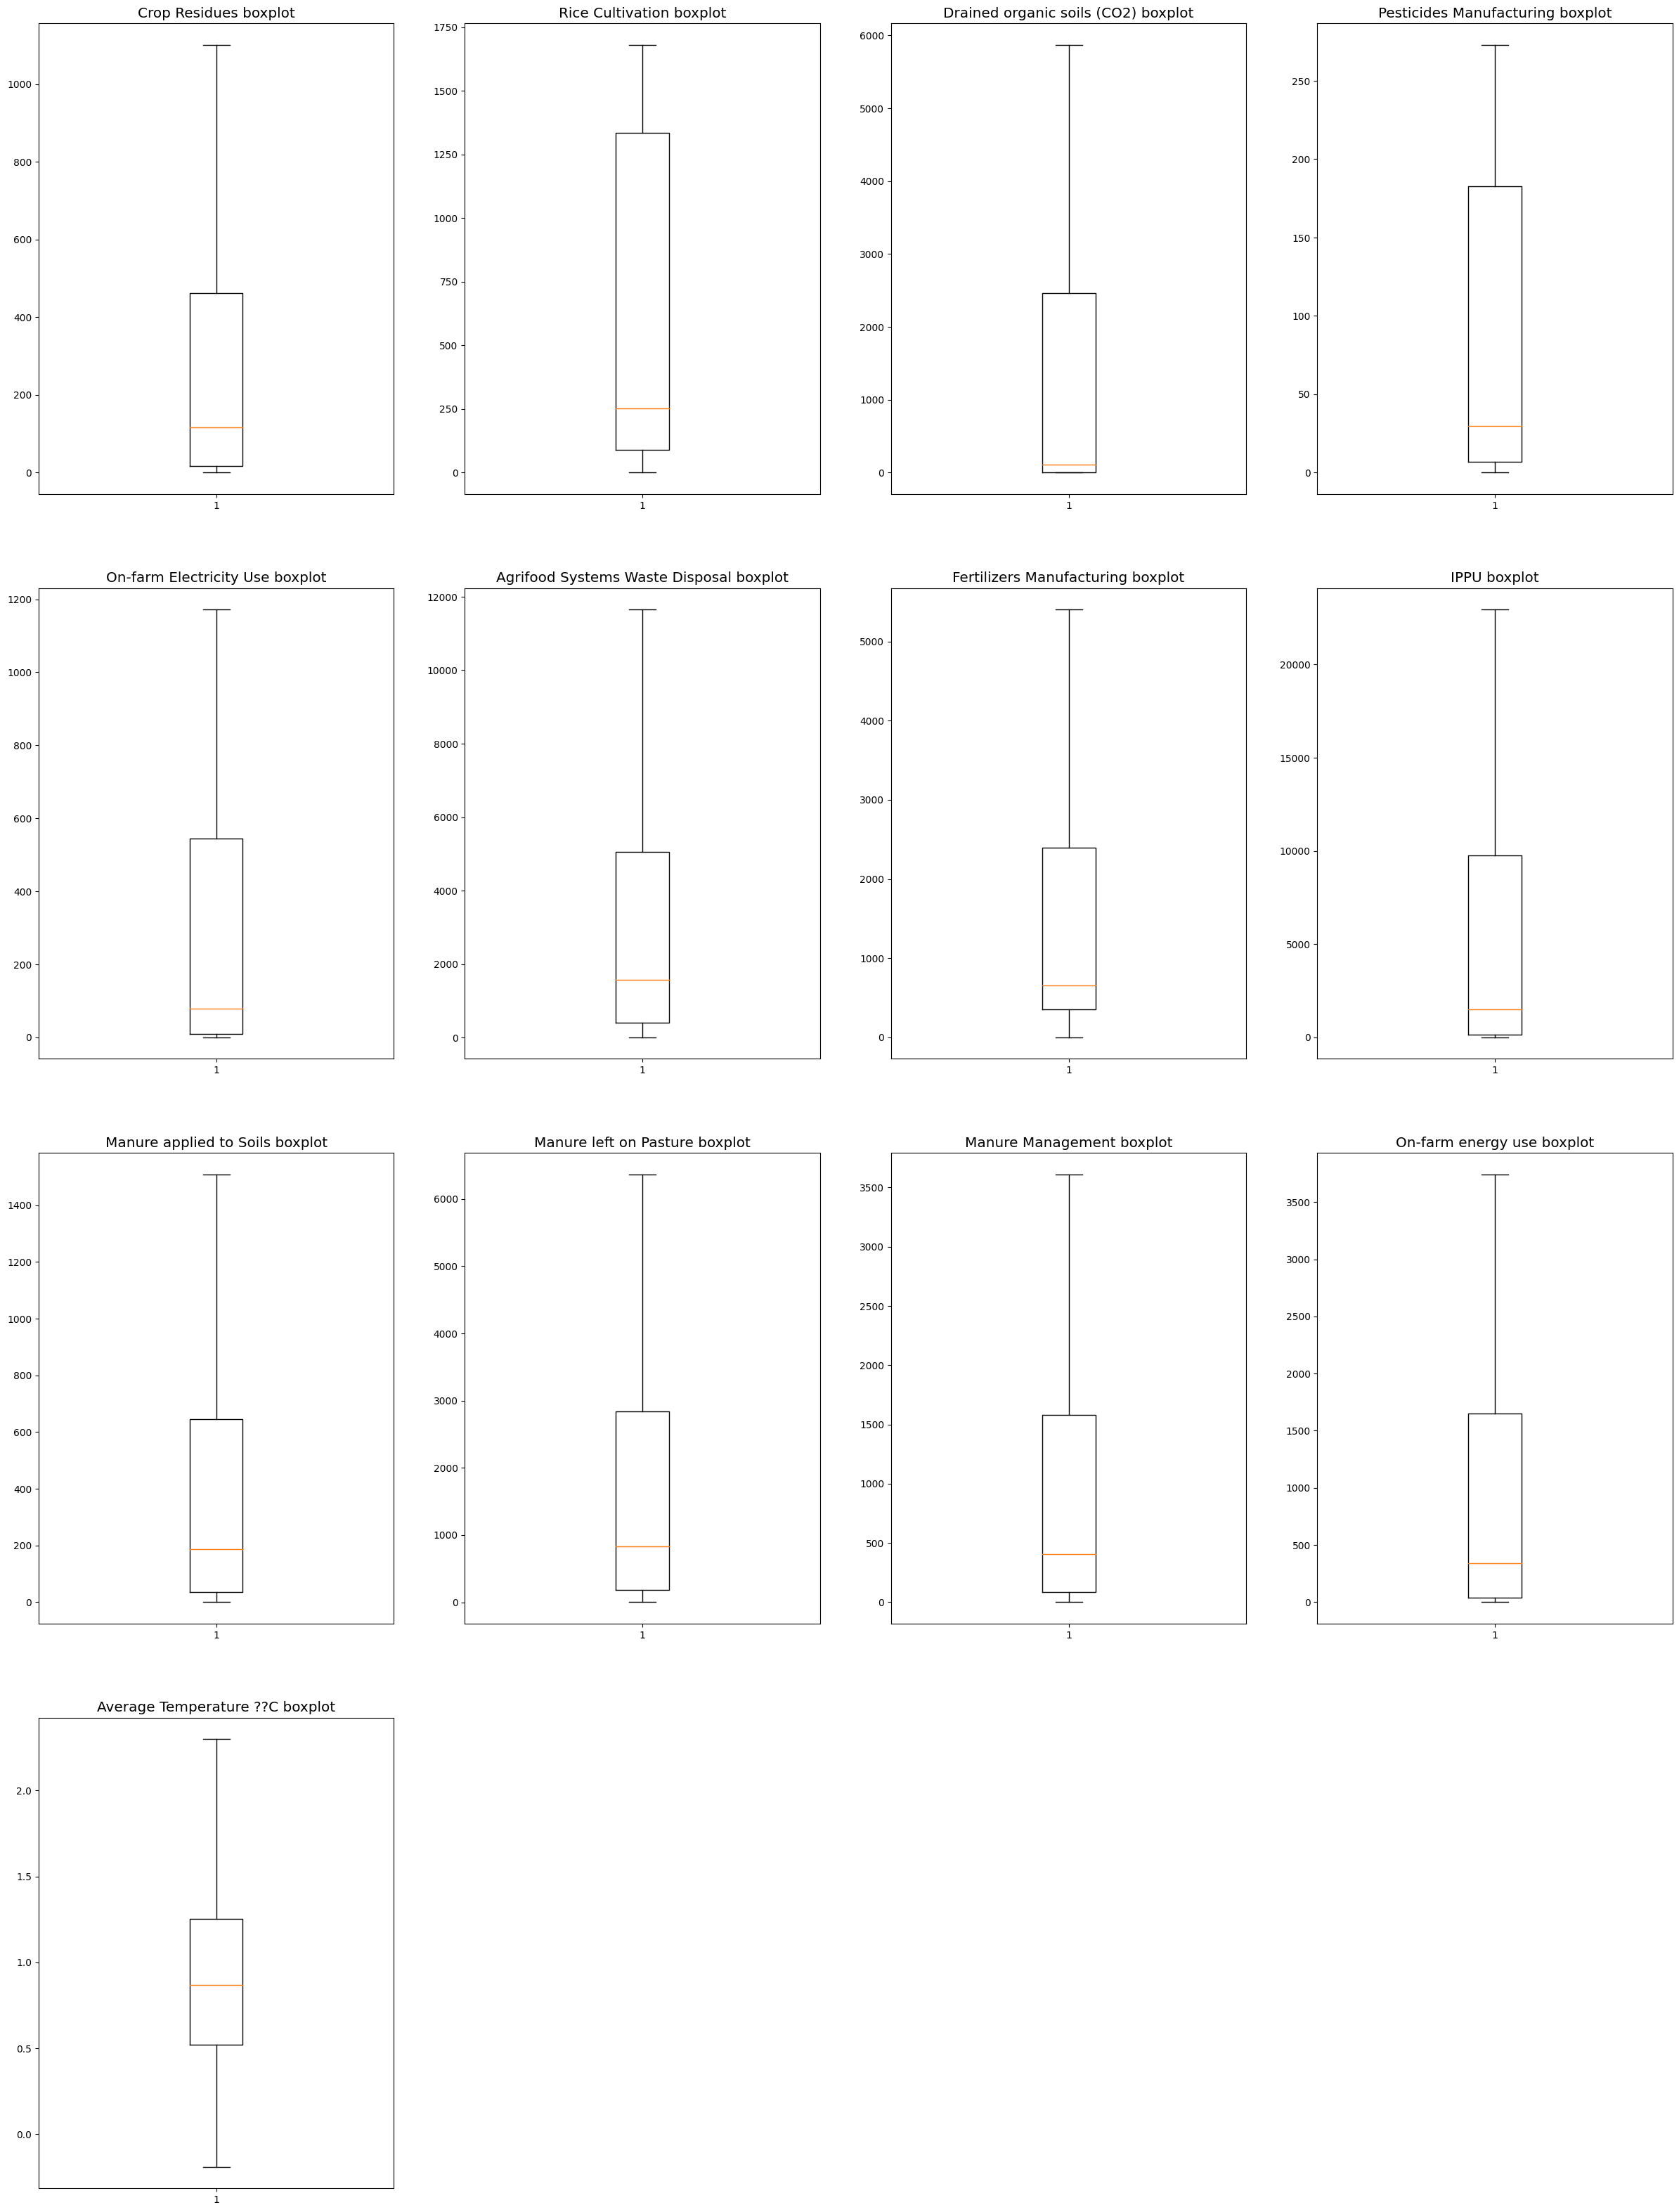

[('Crop Residues', 'double'), ('Rice Cultivation', 'double'), ('Drained organic soils (CO2)', 'double'), ('Pesticides Manufacturing', 'double'), ('On-farm Electricity Use', 'double'), ('Agrifood Systems Waste Disposal', 'double'), ('Fertilizers Manufacturing', 'double'), ('IPPU', 'double'), ('Manure applied to Soils', 'double'), ('Manure left on Pasture', 'double'), ('Manure Management', 'double'), ('On-farm energy use', 'double'), ('Average Temperature ??C', 'double')]


In [16]:
# Boxplot of winsorized 
    # Convert to Pandas DataFrame for plotting
winsorized_df = data_sub_clean.toPandas()

    # Plot boxplots of the Winsorized data
plt.figure(figsize=(30, 40))

i = 1
for col in winsorized_df:
    plt.subplot(4, 4, i)
    plt.boxplot(winsorized_df[col])
    plt.title('{} boxplot'.format(col), fontsize='x-large')
    i += 1
plt.show()

# Display the data types of the columns
print(data_sub.dtypes)

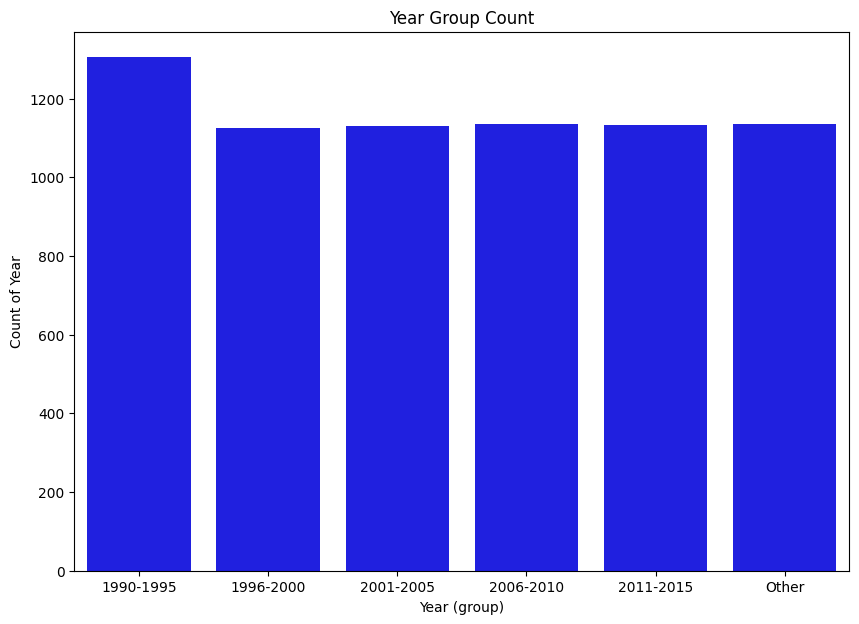

In [19]:
# Group Year
df = df.withColumn('Year', col('Year').cast('int'))

# Define the year ranges
year_ranges = [(1990, 1995), (1996, 2000), (2001, 2005), (2006, 2010), (2011, 2015)]

# Create a new column to group by year ranges
def get_year_group(year):
    for start, end in year_ranges:
        if start <= year <= end:
            return f"{start}-{end}"
    return "Other"

get_year_group_udf = spark.udf.register("get_year_group", get_year_group)

df = df.withColumn("YearGroup", get_year_group_udf(col("Year")))

# Group by year ranges and count the occurrences
year_group_counts = df.groupBy("YearGroup").count().orderBy("YearGroup")

# Convert to Pandas DataFrame for plotting
year_group_counts_pd = year_group_counts.toPandas()

# Plot the bar chart
plt.figure(figsize=(10, 7))
sns.barplot(x="YearGroup", y="count", data=year_group_counts_pd, color="blue")
plt.title('Year Group Count')
plt.xlabel('Year (group)')
plt.ylabel('Count of Year')
plt.show()

In [20]:
# Data type
data_types = data_sub.dtypes
print("Data Types:", data_types)

# Print the data types of each column
data_sub.printSchema()

Data Types: [('Crop Residues', 'double'), ('Rice Cultivation', 'double'), ('Drained organic soils (CO2)', 'double'), ('Pesticides Manufacturing', 'double'), ('On-farm Electricity Use', 'double'), ('Agrifood Systems Waste Disposal', 'double'), ('Fertilizers Manufacturing', 'double'), ('IPPU', 'double'), ('Manure applied to Soils', 'double'), ('Manure left on Pasture', 'double'), ('Manure Management', 'double'), ('On-farm energy use', 'double'), ('Average Temperature ??C', 'double')]
root
 |-- Crop Residues: double (nullable = true)
 |-- Rice Cultivation: double (nullable = true)
 |-- Drained organic soils (CO2): double (nullable = true)
 |-- Pesticides Manufacturing: double (nullable = true)
 |-- On-farm Electricity Use: double (nullable = true)
 |-- Agrifood Systems Waste Disposal: double (nullable = true)
 |-- Fertilizers Manufacturing: double (nullable = true)
 |-- IPPU: double (nullable = true)
 |-- Manure applied to Soils: double (nullable = true)
 |-- Manure left on Pasture: doubl

In [21]:
#04-DT
    #Statistic of the clean dataset
stats = data_sub_clean.describe().toPandas().transpose()
stats.columns = stats.iloc[0]
stats = stats.drop(stats.index[0])
print(stats)

summary                         count                mean              stddev  \
Crop Residues                    4788   317.9252819548805  405.81126627735057   
Rice Cultivation                 4788   635.9128801169421    643.341790788285   
Drained organic soils (CO2)      4788   1487.588174603156  2259.2803468711413   
Pesticides Manufacturing         4788   90.29964494569747  106.61761399582453   
On-farm Electricity Use          4788   336.3992710944118  447.38151449476163   
Agrifood Systems Waste Disposal  4788  3352.3550459481353  3942.0402106561173   
Fertilizers Manufacturing        4788  1631.7854010025353  1804.7236755089034   
IPPU                             4788  6144.0783855471755    8384.03719411736   
Manure applied to Soils          4788   436.7111215538919   526.9558368976475   
Manure left on Pasture           4788  1914.3082456140341  2247.2295467383396   
Manure Management                4788  1053.1080409356812   1284.805747921224   
On-farm energy use          

In [22]:
#Normalize the dataset using z-score
from pyspark.sql.functions import mean, stddev
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, percentile_approx, mean, stddev

    # Function to normalize a column using Z-score
def zscore_column(df, col_name):
    mean_val = df.select(mean(col_name)).collect()[0][0]
    stddev_val = df.select(stddev(col_name)).collect()[0][0]
    return df.withColumn(col_name, ((col(col_name) - mean_val) / stddev_val))

normalized_data_sub_clean = data_sub_clean
for col_name in winsorize_params.keys():
    if col_name != 'Average Temperature ??C':
        normalized_data_sub_clean = zscore_column(normalized_data_sub_clean, col_name)

    # Add Average Temperature back to the normalized dataframe
normalized_data_sub_clean = normalized_data_sub_clean.withColumn(
    'Average Temperature ??C', data_sub_clean['Average Temperature ??C']
)

    #  statistics for the normalized dataset
normalized_stats = normalized_data_sub_clean.describe().toPandas().transpose()
normalized_stats.columns = normalized_stats.iloc[0]
normalized_stats = normalized_stats.drop(normalized_stats.index[0])
print(normalized_stats)

summary                         count                     mean  \
Crop Residues                    4788   1.0104328030550474E-14   
Rice Cultivation                 4788   2.6611127670695763E-14   
Drained organic soils (CO2)      4788    9.256032309312239E-15   
Pesticides Manufacturing         4788   1.6094987590910895E-15   
On-farm Electricity Use          4788  -1.7606634613078046E-14   
Agrifood Systems Waste Disposal  4788    1.817630794785229E-14   
Fertilizers Manufacturing        4788   -1.547912452629009E-14   
IPPU                             4788   -7.763213630837561E-16   
Manure applied to Soils          4788  -1.0639405443170568E-14   
Manure left on Pasture           4788    5.048314871121357E-15   
Manure Management                4788   -4.706529420349118E-15   
On-farm energy use               4788   1.8596374788163682E-14   
Average Temperature ??C          4788       0.9055388471177945   

summary                                      stddev                  min  \

In [23]:
# 05-DMM
# We will use regression，neural network and Random Forest to predict Average Temperature 
# Regression is meaningful because the variables is numeric

In [24]:
#06-DMA
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, percentile_approx
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder


import matplotlib.pyplot as plt
import numpy as np


In [25]:
# Prepare the data for all model
feature_columns = [col for col in data_sub_clean.columns if col != 'Average Temperature ??C']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_data = assembler.transform(data_sub_clean)

    # Normalize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data).select("scaledFeatures", col("Average Temperature ??C").alias("label"))

    # Split the data into training and testing sets
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

In [26]:
# Random Forest regression parameter
rf = RandomForestRegressor(featuresCol="scaledFeatures", labelCol="label", numTrees=10, maxDepth=5, seed=42)
rf_model = rf.fit(train_data)
predictions = rf_model.transform(test_data)

In [27]:
#Linear regression parameter
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="label")

lr_model = lr.fit(train_data)

predictions = lr_model.transform(test_data)

24/05/21 03:40:53 WARN Instrumentation: [b84631bc] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:40:53 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/21 03:40:53 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/05/21 03:40:54 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


R² score of Random Forest: 0.1722657399423726
MAE score of Random Forest: 0.3882579993593385


24/05/21 03:41:13 WARN DAGScheduler: Broadcasting large task binary with size 1105.4 KiB
24/05/21 03:41:14 WARN DAGScheduler: Broadcasting large task binary with size 1614.0 KiB
24/05/21 03:41:24 WARN DAGScheduler: Broadcasting large task binary with size 1089.8 KiB
24/05/21 03:41:24 WARN DAGScheduler: Broadcasting large task binary with size 1585.9 KiB
24/05/21 03:41:33 WARN DAGScheduler: Broadcasting large task binary with size 1066.7 KiB
24/05/21 03:41:33 WARN DAGScheduler: Broadcasting large task binary with size 1560.8 KiB
24/05/21 03:41:37 WARN DAGScheduler: Broadcasting large task binary with size 1159.6 KiB
24/05/21 03:41:37 WARN DAGScheduler: Broadcasting large task binary with size 1747.2 KiB


Cross-Validation R² score of Random Forest: 0.32894009687450376


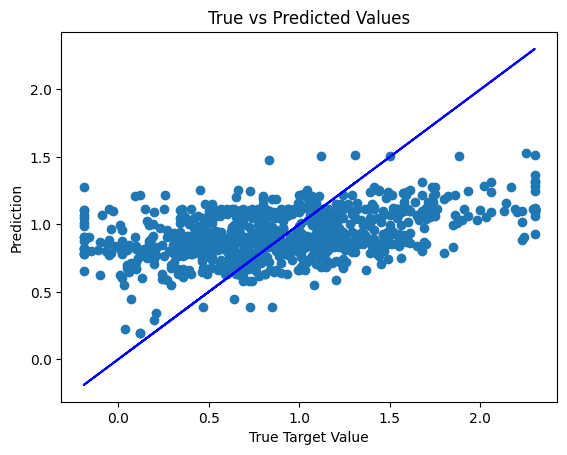

In [28]:
# 07-DM
# Random forest model
    # Random Forest regression parameter
rf = RandomForestRegressor(featuresCol="scaledFeatures", labelCol="label", numTrees=10, maxDepth=5, seed=42)
rf_model = rf.fit(train_data)
predictions = rf_model.transform(test_data)

    # Evaluate the model
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
rf_r2 = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
rf_mae = evaluator.evaluate(predictions)

print("R² score of Random Forest: {}".format(rf_r2))
print("MAE score of Random Forest: {}".format(rf_mae))

    # Cross-Validation
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 20]).addGrid(rf.maxDepth, [5, 10]).build()
crossval = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
cvModel = crossval.fit(train_data)

rf_cross = evaluator.evaluate(cvModel.transform(test_data))
print("Cross-Validation R² score of Random Forest: {}".format(rf_cross))


preds = predictions.select("prediction").collect()
labels = predictions.select("label").collect()

    # Convert to numpy arrays for plotting
preds = np.array([p["prediction"] for p in preds])
labels = np.array([l["label"] for l in labels])

    # Scatter plot 
plt.scatter(labels, preds)
plt.plot(labels, labels, color='blue')
plt.xlabel('True Target Value')
plt.ylabel('Prediction')
plt.title('True vs Predicted Values')
plt.show()


24/05/21 03:41:40 WARN Instrumentation: [e5c657f2] regParam is zero, which might cause numerical instability and overfitting.


R² score of Linear Regression: 0.06678169838956627
MAE score of Linear Regression: 0.4106298729190034


24/05/21 03:41:42 WARN Instrumentation: [0baa80e6] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:43 WARN Instrumentation: [6c34a0ec] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:44 WARN Instrumentation: [f6acb510] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:45 WARN Instrumentation: [01808cd1] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:46 WARN Instrumentation: [913e1b8c] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:46 WARN Instrumentation: [6f75e7fc] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:47 WARN Instrumentation: [f71e2c39] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 03:41:48 WARN Instrumentation: [8f5b82c3] regParam is zero, which might cause numerical instability and overf

Cross-Validation R² score of Linear Regression: 0.05978698755679195
Coefficients of linear regression:
[0.0911567085673301,-0.007109111232193654,0.03378135001468438,-0.03203547029172676,0.0018491391724334556,-0.12506597142894155,-0.0446351725397274,0.2080013212456095,0.1323260197945976,-0.046018363015518884,-0.13228059939554757,-0.03841491078233042]


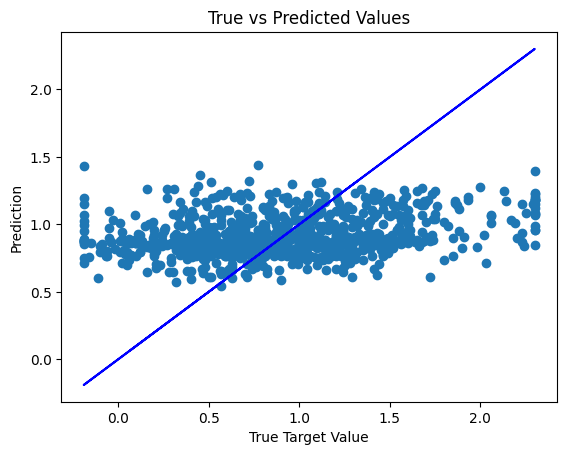

In [29]:
# Linear Regression Model

    #Linear regression parameter
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="label")

lr_model = lr.fit(train_data)

predictions = lr_model.transform(test_data)

    # Evaluate the model
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
lr_r2 = evaluator.evaluate(predictions)
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
lr_mae = evaluator_mae.evaluate(predictions)

print("R² score of Linear Regression: {}".format(lr_r2))
print("MAE score of Linear Regression: {}".format(lr_mae))

    # Cross-validation for Linear Regression
paramGrid = ParamGridBuilder().build()
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=10)

cv_model = crossval.fit(train_data)
lr_cross = cv_model.avgMetrics[0]

print("Cross-Validation R² score of Linear Regression: {}".format(lr_cross))

    # Extract coefficients
lr_coefficients = lr_model.coefficients
print("Coefficients of linear regression:\n{}".format(lr_coefficients))

preds = predictions.select("prediction").collect()
labels = predictions.select("label").collect()

preds = np.array([p["prediction"] for p in preds])
labels = np.array([l["label"] for l in labels])

# Scatter plot of true vs predicted values
plt.scatter(labels, preds)
plt.plot(labels, labels, color='blue')
plt.xlabel('True Target Value')
plt.ylabel('Prediction')
plt.title('True vs Predicted Values')
plt.show()

In [30]:
# Evaluation metrics
Alldata = {
    'Random Forest': [rf_r2, rf_cross, rf_mae],
    'Linear Regression': [lr_r2, lr_cross, lr_mae],
}
evaluation = pd.DataFrame(Alldata)
evaluation.index = ['R² Score', 'Cross Validation Score', 'Mean Absolute Error']

print(evaluation)

                        Random Forest  Linear Regression
R² Score                     0.172266           0.066782
Cross Validation Score       0.328940           0.059787
Mean Absolute Error          0.388258           0.410630


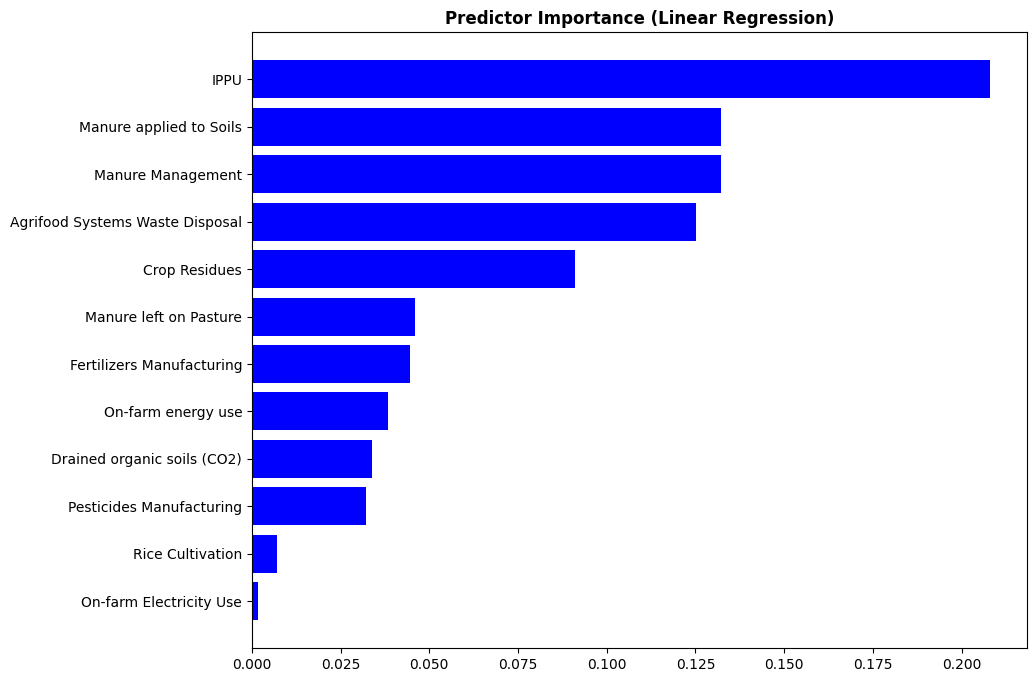

In [31]:
# Visua coefficients with suggest predictor importance from linear regression 
lr_coefficients = np.abs(lr_model.coefficients.toArray())
lr_imp = pd.DataFrame(lr_coefficients, index=feature_columns, columns=["importance"])
lr_imp = lr_imp.sort_values(by='importance')

    # Plotting the coefficients
fig, ax = plt.subplots(figsize=(10, 8))
b = ax.barh(range(len(lr_imp)), lr_imp['importance'], color='blue')

for rect in b:
    w = rect.get_width()

ax.set_yticks(range(len(lr_imp)))
ax.set_yticklabels(lr_imp.index)
plt.title('Predictor Importance (Linear Regression)', loc='center', fontweight='bold')
plt.show()

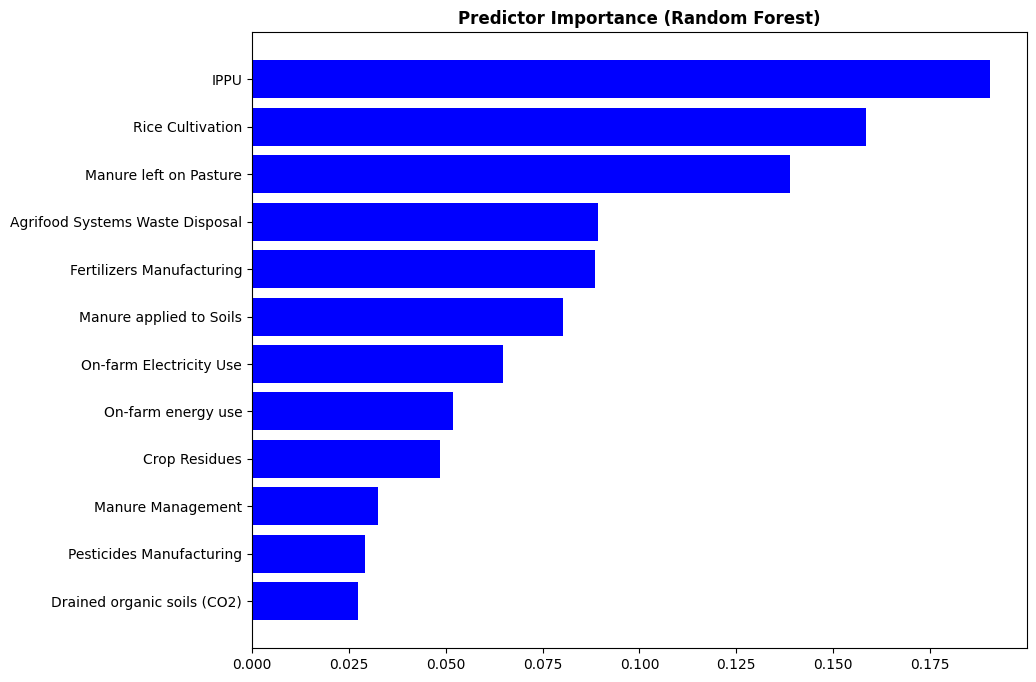

In [32]:
# Predictor importance visualization for random forest
# Extract feature importances
rf_feature_importances = rf_model.featureImportances.toArray()

rf_imp = pd.DataFrame(rf_feature_importances, index=feature_columns, columns=["importance"])
rf_imp = rf_imp.sort_values(by='importance')


# Plotting Random Forest Feature Importances
fig, ax = plt.subplots(figsize=(10, 8))
b = ax.barh(range(len(rf_imp)), rf_imp['importance'], color='blue')

for rect in b:
    w = rect.get_width()

ax.set_yticks(range(len(rf_imp)))
ax.set_yticklabels(rf_imp.index)
plt.title('Predictor Importance (Random Forest)', loc='center', fontweight='bold')
plt.show()

<Figure size 1000x700 with 0 Axes>

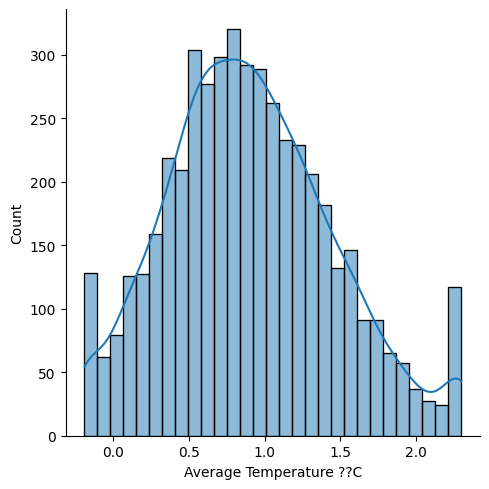

In [33]:
#08-INT
wins_data = data_sub_clean.toPandas()

plt.figure(figsize= (10,7))
sns.displot(x='Average Temperature ??C',data = wins_data,kde=True)

<AxesSubplot:xlabel='IPPU', ylabel='Average Temperature ??C'>

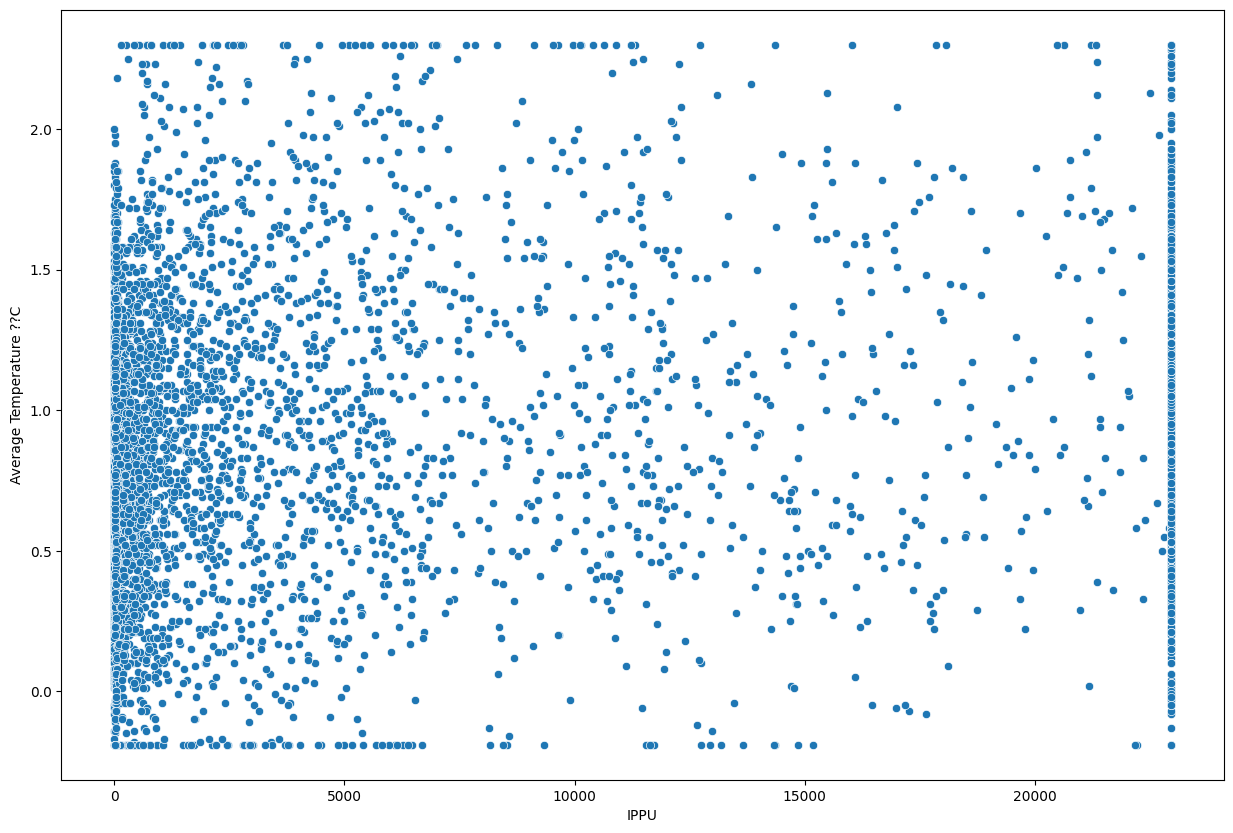

In [34]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='IPPU', y='Average Temperature ??C', data=wins_data)

<AxesSubplot:xlabel='Rice Cultivation', ylabel='Average Temperature ??C'>

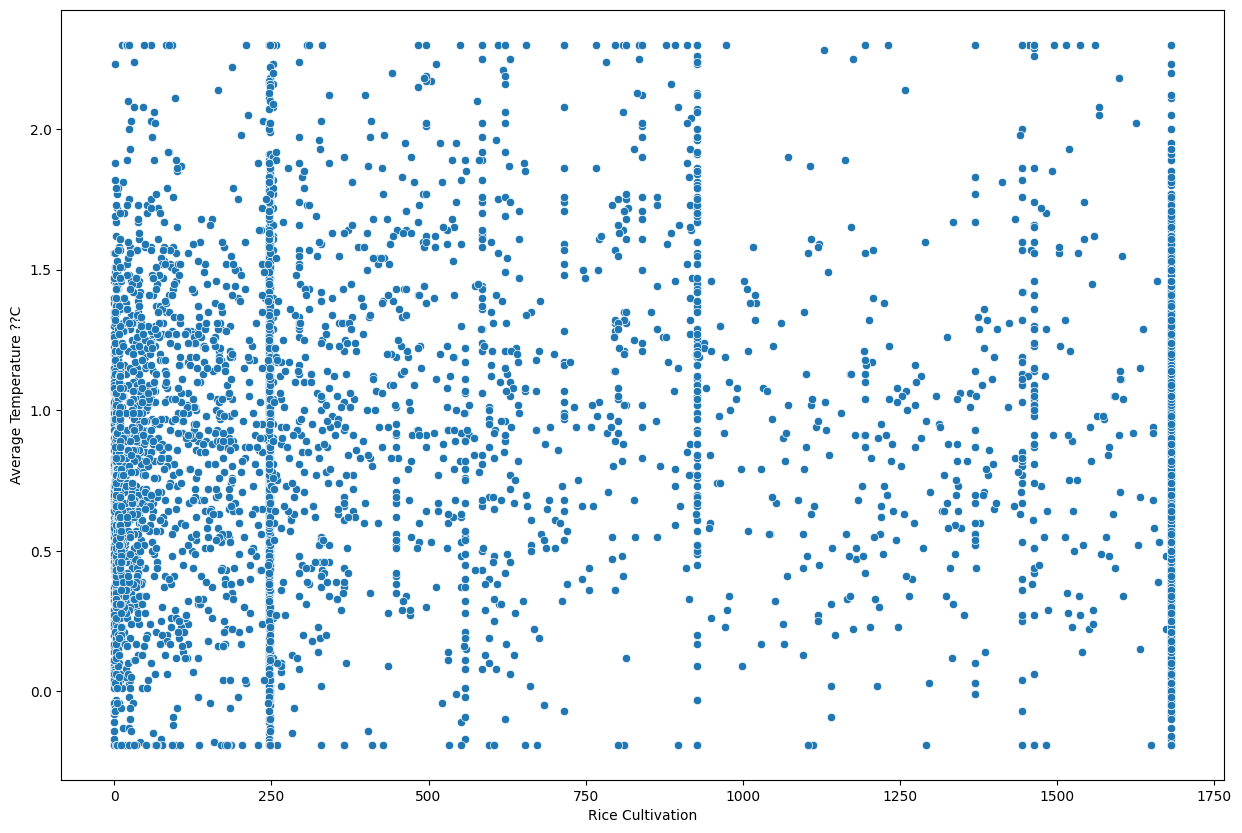

In [35]:
plt.figure(figsize= (15,10))
sns.scatterplot(x='Rice Cultivation',y='Average Temperature ??C',data = wins_data)

<AxesSubplot:xlabel='Manure left on Pasture', ylabel='Average Temperature ??C'>

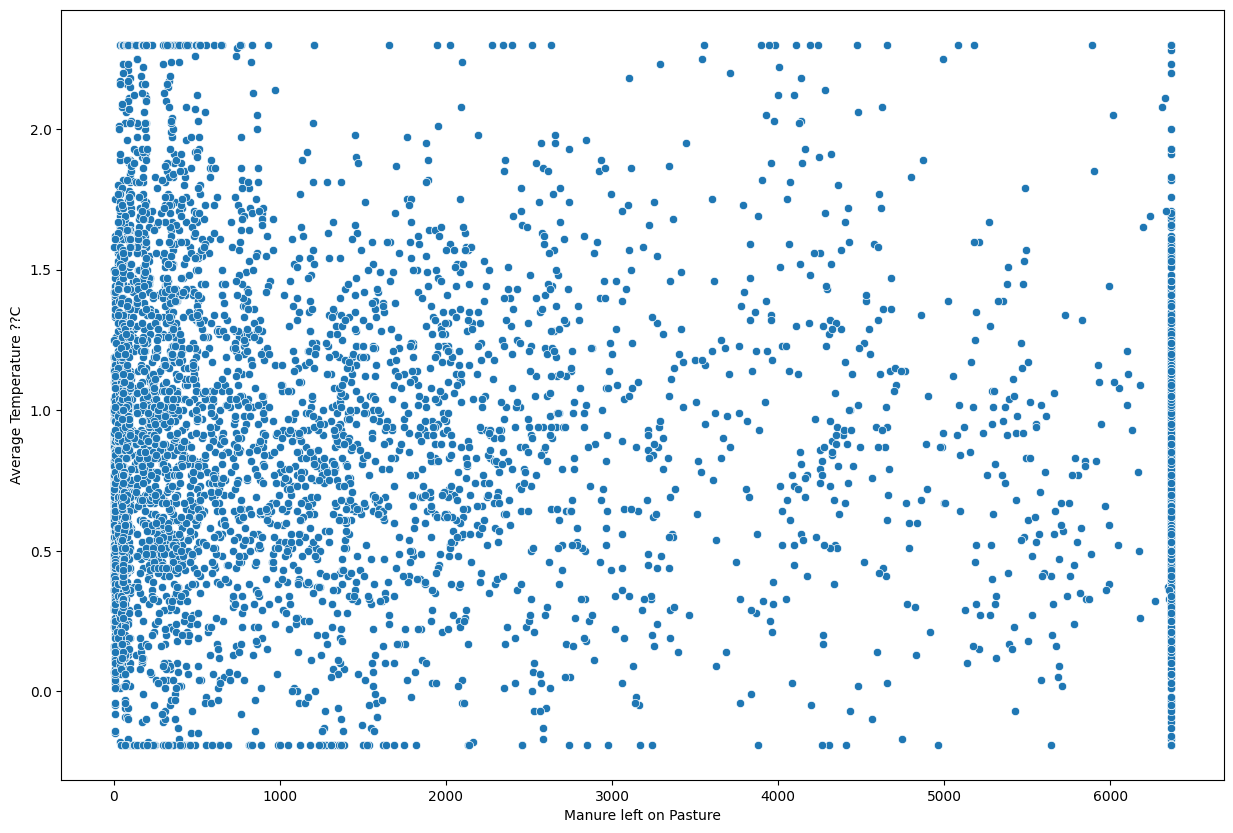

In [36]:
plt.figure(figsize= (15,10))
sns.scatterplot(x='Manure left on Pasture',y='Average Temperature ??C',data = wins_data)